In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import keras
import cv2
import os
import glob
datagen = ImageDataGenerator(rotation_range =10,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         rescale=1./255,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip = True,
                         fill_mode = 'nearest',
                         data_format='channels_last',
                         brightness_range=[0.1, 2])

In [ ]:
datagen.flow_from_directory("/content/gdrive/MyDrive/Train",batch_size=1,class_mode="categorical")

Found 8210 images belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,

    horizontal_flip=True,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory("/content/gdrive/MyDrive/Train"
    ,
    batch_size=1,color_mode= "grayscale",
    class_mode='binary',target_size=(32,32),
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    "/content/gdrive/MyDrive/Train",color_mode= "grayscale", # same directory as training data
    batch_size=1,target_size=(32,32),
    class_mode='binary',subset='validation') # set as validation data


test_data = train_datagen.flow_from_directory(
    "/content/gdrive/MyDrive/data",color_mode= "grayscale", # same directory as training data
    batch_size=1,target_size=(32,32),
    class_mode='binary') # set as validation data

Found 19747 images belonging to 2 classes.
Found 8463 images belonging to 2 classes.
Found 596 images belonging to 2 classes.


In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

from keras.models import load_model
import tensorflow as tf
optimizer = tf.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (2, 2), input_shape=(32,32,1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (2, 2)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, (2, 2)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
			optimizer=optimizer,
			metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


NameError: ignored

In [ ]:
model.summary()

In [ ]:

history = model.fit(train_generator,
      steps_per_epoch=100,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=20)

Epoch 1/15
100/100 [==============================] - 52s 510ms/step - loss: 0.6837 - accuracy: 0.6600 - val_loss: 0.4126 - val_accuracy: 0.9000
Epoch 2/15
100/100 [==============================] - 49s 493ms/step - loss: 0.5480 - accuracy: 0.7300 - val_loss: 0.3274 - val_accuracy: 0.8000
Epoch 3/15
100/100 [==============================] - 47s 475ms/step - loss: 0.3539 - accuracy: 0.7400 - val_loss: 0.3890 - val_accuracy: 1.0000
Epoch 4/15
100/100 [==============================] - 49s 491ms/step - loss: 0.2713 - accuracy: 0.9300 - val_loss: 0.3336 - val_accuracy: 0.8500
Epoch 5/15
100/100 [==============================] - 51s 495ms/step - loss: 0.1454 - accuracy: 0.9400 - val_loss: 0.1943 - val_accuracy: 0.9000
Epoch 6/15
100/100 [==============================] - 48s 482ms/step - loss: 0.0772 - accuracy: 0.9700 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 7/15
100/100 [==============================] - 50s 498ms/step - loss: 0.2809 - accuracy: 0.9200 - val_loss: 0.0947 - val_ac

In [ ]:
model.evaluate(test_data)

596/596 [==============================] - 114s 191ms/step - loss: 0.1218 - accuracy: 0.9597


[0.12177765369415283, 0.9597315192222595]

In [ ]:
model.evaluate(validation_generator)

8463/8463 [==============================] - 1850s 219ms/step - loss: 0.0479 - accuracy: 0.9859


In [ ]:
model.evaluate(train_generator)

19747/19747 [==============================] - 1584s 80ms/step - loss: 0.0398 - accuracy: 0.9875


[0.039793457835912704, 0.98749178647995]

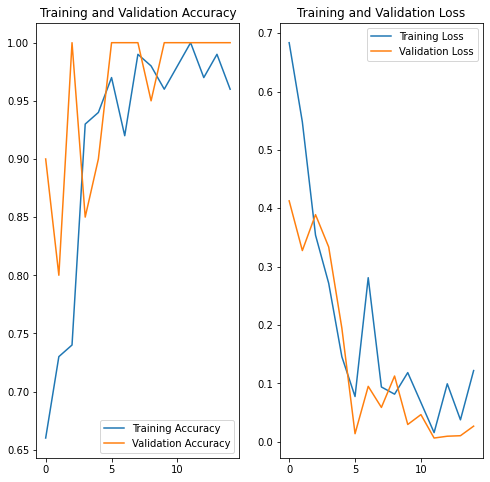

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow as imshow
import cv2
import numpy as np
def quantification(image):
  mask = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)
  mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)[1]
  mask = cv2.erode(mask, np.ones((8, 0), "uint8"))
  mask = cv2.dilate(mask, np.ones((16, 0), "uint8"))
  mask = cv2.medianBlur(mask,5)
  ok= cv2.cvtColor(kalla, cv2.COLOR_BGR2GRAY)
  half=ok
  max = 0
  for i in half:
    j = 0
    while j < len(i):
      if i[j] == 0:
        p = j
        while j < len(i):
          if i[j] == 0:
            j += 1
          else:
            break
        if max < (j-p):
          max = j-p
      j+=1
  return max
